### Build Final Results
 - load model weights
 - score images
 - build matrix

\[x] build matrix

\[ ] crop the images

In [92]:
from fastai2.vision.all import *
from fastai2.basics import *
from torchvision.models import vgg19, vgg16
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt
import numpy as np

from imports.suttstyle import StyleImport

##### Load the model type

In [37]:
img_fn = 'style.jpg'

s = StyleImport()
_ = s.build_feats()
loss_func = s.build_loss_func(style_fn = img_fn)
tnet = s.build_arch()
dls = s.build_dls()

In [38]:
learn = Learner(dls, tnet, loss_func=loss_func)

##### Iterate over models, and content images

In [142]:
model_fns = [
    'stage1',
    'biggie1_stage1',
    'ink_model',
    'watercolor_model'
]

In [143]:
content_fns = [f'imgs/content{i}.jpg' for i in range(1,4+1)]

In [144]:
def save_image(pred_image, content_num, style_num):
    out = np.uint8(pred_image)
    out = np.transpose(out, (1,2,0))
    img = Image.fromarray(out)
    img.save(f'imgs/content{content_num}_style{style_num}.jpg')

In [ ]:
for i, model_fn in enumerate(model_fns):
    
    learn.load(model_fn)
    
    for j, content_fn in enumerate(content_fns):
        
        pred_image = learn.predict(content_fn)[0]
        
        save_image(pred_image, j+1, i+1)


##### Plot results

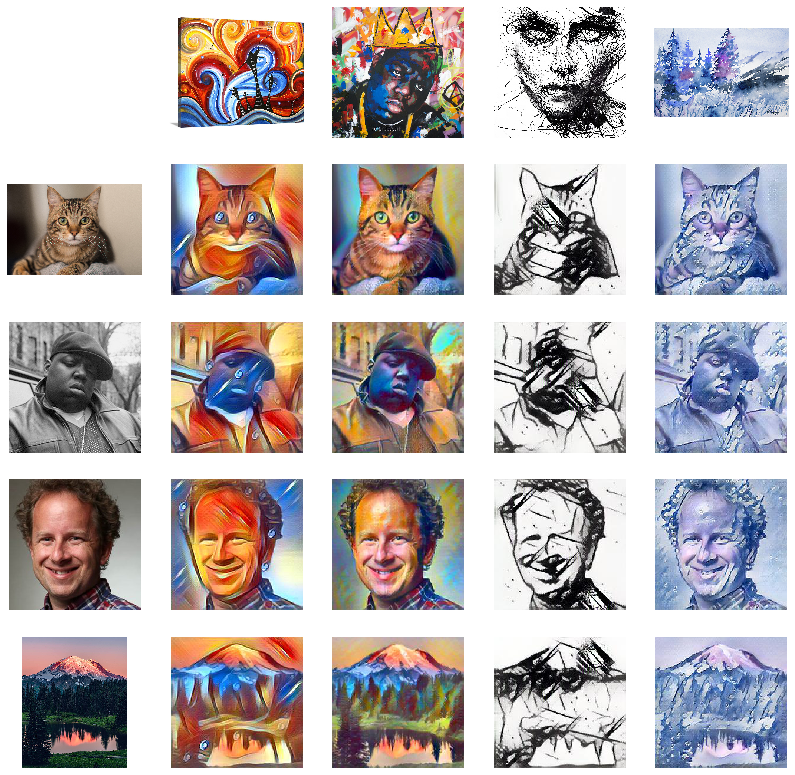

In [162]:
ROWS, COLS = 5,5
fig, ax = plt.subplots(nrows=ROWS, ncols=COLS, figsize=(14,14))

for _row in range(ROWS):
    for _col in range(COLS):
        
        ax[_row][_col].axis('off')
        
        if _row == 0 and _col == 0:
            continue
          
        if _row == 0:
             _imgfn = f'style{_col}.jpg'
        elif _col == 0:
            _imgfn = f'content{_row}.jpg'
        else:
            _imgfn = f'content{_row}_style{_col}.jpg'
            
#         ax[_row][_col].set_title('hey')

        _img = Image.open('imgs/' + _imgfn, )
        _img = np.array(_img)
        ax[_row][_col].imshow(_img, cmap='gray')
        

In [163]:
fig.savefig('imgs/output_4by4.png')